### Nonlinear Inversion for 1-D Crustal Velocity Structure Using Cross-Convolution of Teleseismic Waveforms

In [6]:
# 2023 fall semester coursework requirement project
# project related to Time Series Analysis in Geophysics

In [1]:
import obspy
from obspy import read
import numpy as np
from scipy.signal import convolve
import pandas as pd
import os
import matplotlib.pyplot as plt
from obspy import read

#...............................................................................................................
# data loading
# synthetic

BEST_Er3 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT3/BEST_SYNDIR/SYN_Er_best.sac"
BEST_Ez3 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT3/BEST_SYNDIR/SYN_Ez_best.sac"


BEST_Er4 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT4/BEST_SYNDIR/SYN_Er_best.sac"
BEST_Ez4 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT4/BEST_SYNDIR/SYN_Ez_best.sac"

BEST_Er5 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT5/BEST_SYNDIR/SYN_Er_best.sac"
BEST_Ez5 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT5/BEST_SYNDIR/SYN_Ez_best.sac"

BEST_Er6 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT6/BEST_SYNDIR/SYN_Er_best.sac"
BEST_Ez6 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT6/BEST_SYNDIR/SYN_Ez_best.sac"

BEST_Er7 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/BEST_SYNDIR/SYN_Er_best.sac"
BEST_Ez7 = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/BEST_SYNDIR/SYN_Ez_best.sac"


stream_er_best7 = read(BEST_Er7)
stream_ez_best7 = read(BEST_Ez7)

stream_er_best3 = read(BEST_Er3)
stream_ez_best3 = read(BEST_Ez3)

stream_er_best4 = read(BEST_Er4)
stream_ez_best4 = read(BEST_Ez4)


stream_er_best5 = read(BEST_Er5)
stream_ez_best5 = read(BEST_Ez5)

stream_er_best6 = read(BEST_Er6)
stream_ez_best6 = read(BEST_Ez6)



trace_er_best7 = stream_er_best7[0].data
trace_ez_best7 = stream_ez_best7[0].data


trace_er_best3 = stream_er_best3[0].data
trace_ez_best3 = stream_ez_best3[0].data

trace_er_best4 = stream_er_best4[0].data
trace_ez_best4 = stream_ez_best4[0].data


trace_er_best5 = stream_er_best5[0].data
trace_ez_best5 = stream_ez_best5[0].data

trace_er_best6 = stream_er_best6[0].data
trace_ez_best6 = stream_ez_best6[0].data

#...............................................................................................................
# data loading
# observed

OBS_Z = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/OBS_Z.sac"
OBS_R = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/OBS_R.sac"

conv_OBS_Z = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/Convolved_OBS_Z.sac"
conv_OBS_R = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/Convolved_OBS_R.sac"

noisy_conv_OBS_Z = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/Noisy_Convolved_OBS_Z.sac"
noisy_conv_OBS_R = "/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR/Noisy_Convolved_OBS_R.sac"



stream_oz = read(OBS_Z)
stream_or = read(OBS_R)

stream_conv_oz = read(conv_OBS_Z)
stream_conv_or = read(conv_OBS_R)

stream_noisy_conv_oz = read(noisy_conv_OBS_Z)
stream_noisy_conv_or = read(noisy_conv_OBS_R)



trace_or = stream_or[0].data
trace_oz = stream_oz[0].data

trace_conv_or = stream_conv_or[0].data
trace_conv_oz = stream_conv_oz[0].data

trace_noisy_conv_or = stream_noisy_conv_or[0].data
trace_noisy_conv_oz = stream_noisy_conv_oz[0].data



In [2]:
import matplotlib.pyplot as plt
from scipy.signal import convolve

def plot_fitting(x1, x2, label1, label2, ls1, ls2, color1, color2, alpha1, alpha2, lw1, lw2):
    plt.figure(figsize=(15, 5))
    plt.plot(x1, label=label1, linestyle=ls1, color=color1, alpha=alpha1, lw=lw1)
    plt.plot(x2, label=label2, linestyle=ls2, color=color2, alpha=alpha2, lw=lw2)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

def plot_adjust_fitting(x1, x2, label1, label2, ls1, ls2, color1, color2, alpha1, alpha2, lw1, lw2):
    plt.figure(figsize=(8, 4))
    plt.plot(x1[0:1300], label=label1, linestyle=ls1, color=color1, alpha=alpha1, lw=lw1)
    plt.plot(x2[0:1300], label=label2, linestyle=ls2, color=color2, alpha=alpha2, lw=lw2)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

class Fitting_Layer:
    def __init__(self, trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best, trace_ez_best):
        self.trace_noisy_conv_oz = trace_noisy_conv_oz
        self.trace_noisy_conv_or = trace_noisy_conv_or
        self.trace_er_best = trace_er_best
        self.trace_ez_best = trace_ez_best

    def get_plot(self):
        conv_Er_Z = convolve(self.trace_noisy_conv_oz, self.trace_er_best, mode="same")
        conv_Ez_R = convolve(self.trace_noisy_conv_or, self.trace_ez_best, mode="same")
        plot_fitting(conv_Er_Z, conv_Ez_R, "Z(t)*Er(t)", "R(t)*Ez(t)", '--', '-', 'r', 'b', 1, 0.8, 2, 1)

    def get_adjust_plot(self):
        conv_Er_Z = convolve(self.trace_noisy_conv_oz, self.trace_er_best, mode="same")
        conv_Ez_R = convolve(self.trace_noisy_conv_or, self.trace_ez_best, mode="same")
        plot_adjust_fitting(conv_Er_Z, conv_Ez_R, "Z(t)*Er(t)", "R(t)*Ez(t)", '--', '-', 'r', 'b', 1, 0.8, 2, 1)


class Fitting_SevenLayer(Fitting_Layer):
    pass

class Fitting_SixLayer(Fitting_Layer):
    pass


class Fitting_FiveLayer(Fitting_Layer):
    pass

class Fitting_FourLayer(Fitting_Layer):
    pass

class Fitting_ThreeLayer(Fitting_Layer):
    pass



# seven_layer_fitting = Fitting_SevenLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best7, trace_ez_best7)
# seven_layer_fitting.get_plot()
# seven_layer_fitting.get_adjust_plot()

# six_layer_fitting = Fitting_SixLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best6, trace_ez_best6)
# six_layer_fitting.get_plot()
# six_layer_fitting.get_adjust_plot()

# five_layer_fitting = Fitting_FiveLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best5, trace_ez_best5)
# five_layer_fitting.get_plot()
# five_layer_fitting.get_adjust_plot()


# four_layer_fitting = Fitting_FourLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best4, trace_ez_best4)
# four_layer_fitting.get_plot()
# four_layer_fitting.get_adjust_plot()

# three_layer_fitting = Fitting_FourLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best3, trace_ez_best3)
# three_layer_fitting.get_plot()
# three_layer_fitting.get_adjust_plot()



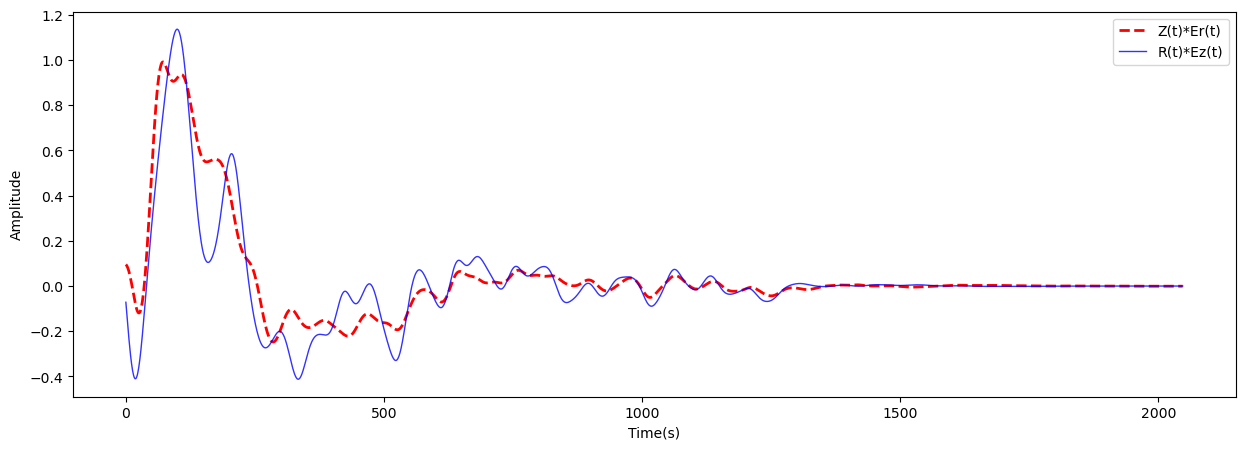

In [6]:
# Er(t) * Z(t) = Ez(t) * R(t) fitting for 7_layer test 
seven_layer_fitting = Fitting_SevenLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best7, trace_ez_best7)
seven_layer_fitting.get_plot()

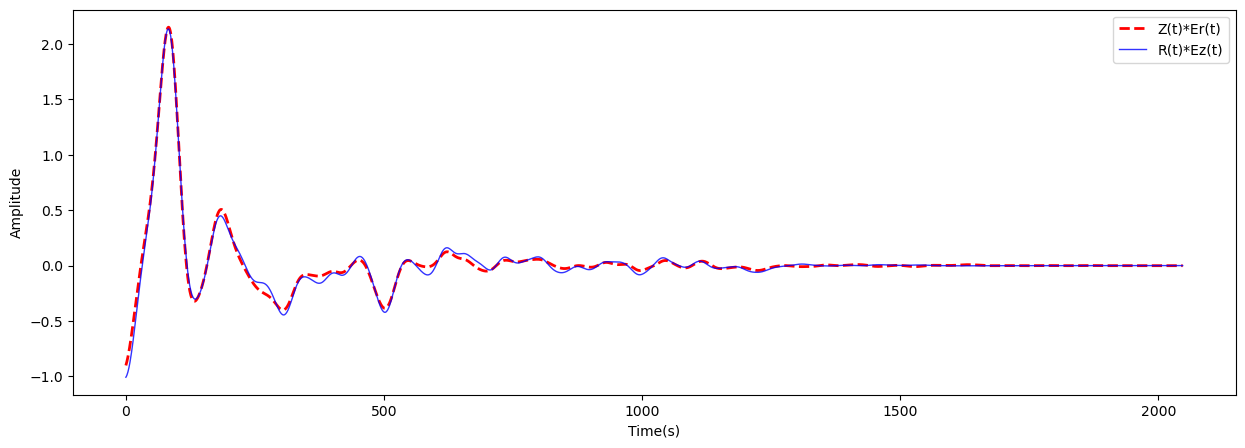

In [21]:
# Er(t) * Z(t) = Ez(t) * R(t) fitting for 4_layer test 
four_layer_fitting = Fitting_FourLayer(trace_noisy_conv_oz, trace_noisy_conv_or, trace_er_best4, trace_ez_best4)
four_layer_fitting.get_plot()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class SeismologyModelPlotter:
    def __init__(self, base_model_dir, obs_dir, best_model_file):
        self.base_model_dir = base_model_dir
        self.obs_dir = obs_dir
        self.best_model_file = best_model_file
        self.num_models = 1000

    def read_velocity_model(self, file_path):
        depths, vp, vs, rho = [], [], [], []
        cumulative_depth = 0

        with open(file_path, 'r') as file:
            data_started = False
            for line in file:
                if line.strip().startswith('H(KM)'):
                    data_started = True
                    continue

                if data_started:
                    parts = line.split()
                    try:
                        depth = float(parts[0])
                        cumulative_depth += depth
                        vp_value = float(parts[1])
                        vs_value = float(parts[2])
                        rho_value = float(parts[3])

                        depths.append(cumulative_depth)
                        vp.append(vp_value)
                        vs.append(vs_value)
                        rho.append(rho_value)
                    except (ValueError, IndexError):
                        continue

        return depths, vp, vs, rho

    def plot_models(self):
        plt.figure(figsize=(5, 7))

        for i in range(1, self.num_models + 1):
            file_path = f'{self.base_model_dir}/MODELSDIR/SCM_{i}.mod'
            depths, vp, vs, rho = self.read_velocity_model(file_path)

            depths.insert(0, 0)
            vp.insert(0, vp[0])
            vs.insert(0, vs[0])
            rho.insert(0, rho[0])
            depths[-1] += 5

            plt.step(vp, depths, where='post', color='c', alpha=0.01)
            plt.step(vs, depths, where='post', color='c', alpha=0.01)

        obs_path = f'{self.obs_dir}/SCM.mod'
        obs_depths, obs_vp, obs_vs, obs_rho = self.read_velocity_model(obs_path)
        self._prepare_and_plot(obs_depths, obs_vp, obs_vs, 'Vp true', 'Vs true', 'k', 'b')

        depths_best, vp_best, vs_best, rho_best = self.read_velocity_model(self.best_model_file)
        self._prepare_and_plot(depths_best, vp_best, vs_best, 'Vp best', 'Vs best', 'red', 'orange')

        plt.gca().invert_yaxis()
        plt.xlabel('Velocity (km/s)', fontsize=15)
        plt.ylabel('Depth (km)', fontsize=15)
        plt.legend(loc='upper right', bbox_to_anchor=(1,1))
        plt.xlim([2, 9])
        plt.ylim([max(depths), 0])
        plt.xticks(ticks=np.arange(2, 9, 1))
        plt.show()

    def _prepare_and_plot(self, depths, vp, vs, vp_label, vs_label, vp_color, vs_color):
        depths.insert(0, 0)
        vp.insert(0, vp[0])
        vs.insert(0, vs[0])
        depths[-1] += 5
        plt.step(vp, depths, where='post', label=vp_label, color=vp_color, alpha=1)
        plt.step(vs, depths, where='post', label=vs_label, color=vs_color, alpha=1)
        
        
    def _finalize_plot(self, depths, title):
        plt.gca().invert_yaxis()
        plt.xlabel('Velocity (km/s)', fontsize=15)
        plt.ylabel('Depth (km)', fontsize=15)
        plt.legend(loc='upper right', bbox_to_anchor=(1,1))
        plt.xlim([2, 9])
        plt.ylim([max(depths), 0])
        plt.xticks(ticks=np.arange(2, 9, 1))
        plt.title(title)
        plt.show()

    def plot_true_model(self):
        plt.figure(figsize=(5, 7))
        obs_path = f'{self.obs_dir}/SCM.mod'
        obs_depths, obs_vp, obs_vs, obs_rho = self.read_velocity_model(obs_path)
        self._prepare_and_plot(obs_depths, obs_vp, obs_vs, 'Vp true', 'Vs true', 'k', 'b')
        self._finalize_plot(obs_depths, "True Model")

    def plot_best_model(self):
        plt.figure(figsize=(5, 7))
        depths_best, vp_best, vs_best, rho_best = self.read_velocity_model(self.best_model_file)
        self._prepare_and_plot(depths_best, vp_best, vs_best, 'Vp best', 'Vs best', 'red', 'orange')
        self._finalize_plot(depths_best, "Best Model")


# Example usage for PROJECTFFT7
project_fft7 = SeismologyModelPlotter('/Users/ahasan/Documents/seismology_software/PROJECTFFT7',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT7/OBSDIR',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT7/BEST.mod')
# Example usage for PROJECTFFT7
project_fft6 = SeismologyModelPlotter('/Users/ahasan/Documents/seismology_software/PROJECTFFT6',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT6/OBSDIR',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT6/BEST.mod')
# Example usage for PROJECTFFT7
project_fft5 = SeismologyModelPlotter('/Users/ahasan/Documents/seismology_software/PROJECTFFT5',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT5/OBSDIR',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT5/BEST.mod')
# Example usage for PROJECTFFT7
project_fft4 = SeismologyModelPlotter('/Users/ahasan/Documents/seismology_software/PROJECTFFT4',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT4/OBSDIR',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT4/BEST.mod')
# Example usage for PROJECTFFT7
project_fft3 = SeismologyModelPlotter('/Users/ahasan/Documents/seismology_software/PROJECTFFT3',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT3/OBSDIR',
                                      '/Users/ahasan/Documents/seismology_software/PROJECTFFT3/BEST.mod')



# project_fft7.plot_true_model()
# project_fft6.plot_true_model()
# project_fft5.plot_true_model()
# project_fft4.plot_true_model()
#project_fft3.plot_true_model()

# project_fft7.plot_best_model()
# project_fft6.plot_best_model()
# project_fft5.plot_best_model()
# project_fft4.plot_best_model()
#project_fft3.plot_best_model()

#project_fft7.plot_models()
# project_fft6.plot_models()
# project_fft5.plot_models()
# project_fft4.plot_models()
#project_fft3.plot_models()

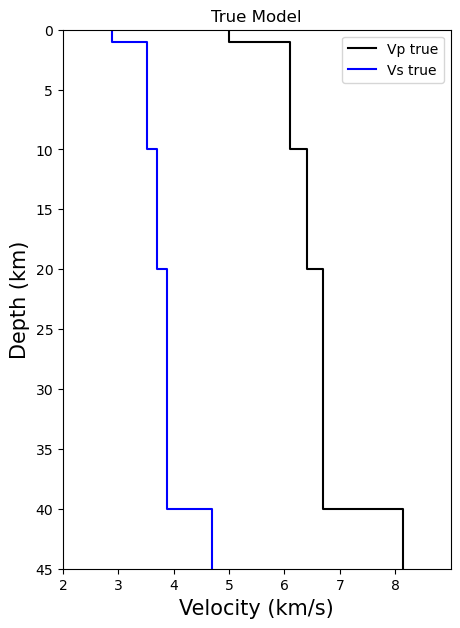

In [14]:
#True Model
project_fft7.plot_true_model()

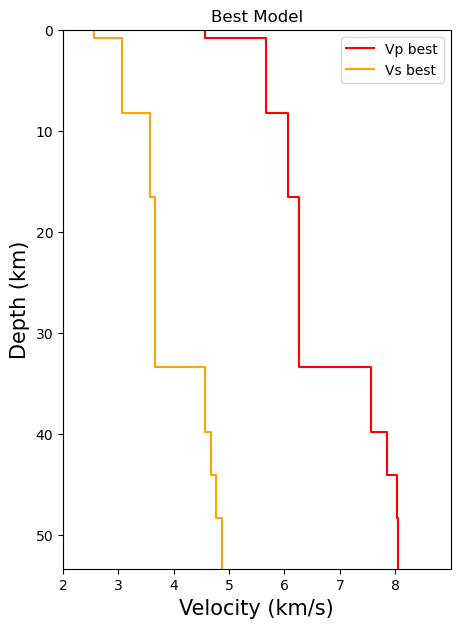

In [15]:
# 7_layer test best model
project_fft7.plot_best_model()

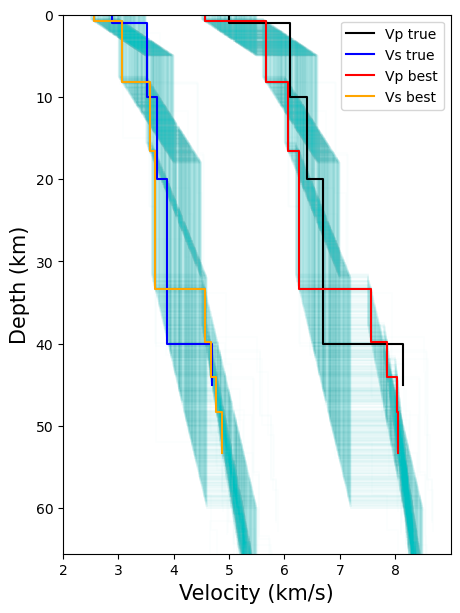

In [16]:
# 7_layer test plot all models together
project_fft7.plot_models()

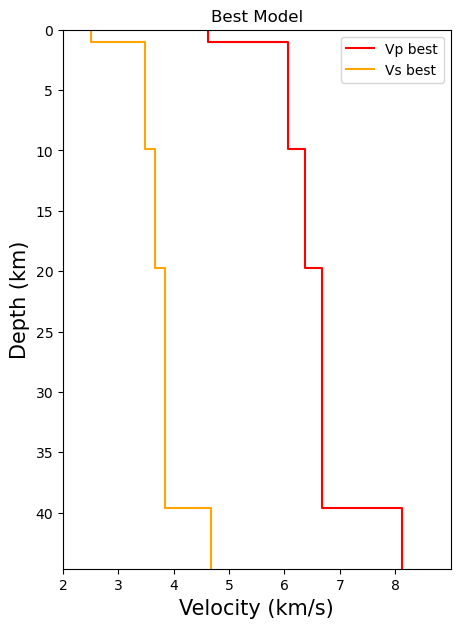

In [17]:
project_fft4.plot_best_model()

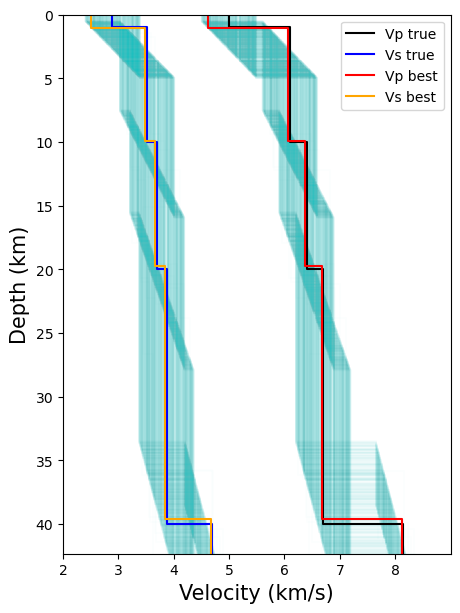

In [20]:
# 4_layer test plot all models together
project_fft4.plot_models()

In [5]:
import pandas as pd
import numpy as np

class MisfitAnalyzer:
    def __init__(self, misfit_file_path):
        self.misfit_file_path = misfit_file_path
        self.misfit_df = pd.read_csv(misfit_file_path)
        self.misfit_array = self.misfit_df[self.misfit_df.columns[1]].to_numpy()

    def get_min_misfit(self):
        min_idx = np.argmin(self.misfit_array)
        return self.misfit_array[min_idx], min_idx

    def get_max_misfit(self):
        max_idx = np.argmax(self.misfit_array)
        return self.misfit_array[max_idx], max_idx

# Example usage for PROJECTFFT4
project_fft7_misfit = MisfitAnalyzer('/Users/ahasan/Documents/seismology_software/PROJECTFFT4/misfits.csv')
min_misfit, min_idx = project_fft7_misfit.get_min_misfit()
max_misfit, max_idx = project_fft7_misfit.get_max_misfit()

print(f"PROJECTFFT4 - Min Misfit: {min_misfit} at index {min_idx}")



PROJECTFFT4 - Min Misfit: 1.3299775 at index 519
